# Posttest 6

### Import Library

In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
import tensorflow as tf
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [352]:
film = pd.read_csv('movies.csv')
film

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,NaN,12470,NaN
3,The Chaos Class,1975,87,NaN,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,NaN,42018,NaN
4,Daman,2022,121,NaN,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",9.1,NaN,13372,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9844,Welcome to the Jungle,I) (2013,95,Not Rated,"Action, Adventure, Comedy","['Rob Meltzer', 'Jean-Claude Van Damme', 'Adam...","['Jean-Claude Van Damme', 'Adam Brody', 'Rob H...",4.9,25.0,13770,NaN
9845,Boat Trip,2002,94,R,Comedy,"['Mort Nathan', 'Cuba Gooding Jr.', 'Horatio S...","['Cuba Gooding Jr.', 'Horatio Sanz', 'Roselyn ...",4.9,18.0,31972,8.59
9846,Did You Hear About the Morgans?,2009,103,PG-13,"Comedy, Drama, Romance","['Marc Lawrence', 'Hugh Grant', 'Sarah Jessica...","['Hugh Grant', 'Sarah Jessica Parker', 'Sam El...",4.9,27.0,41830,29.58
9847,The Crow: Salvation,2000,102,R,"Action, Crime, Fantasy","['Bharat Nalluri', 'Kirsten Dunst', 'William A...","['Kirsten Dunst', 'William Atherton', 'Debbie ...",4.9,NaN,11938,NaN


In [255]:
film.dtypes

title           object
year            object
runtime          int64
certificate     object
genre           object
director        object
stars           object
rating         float64
metascore      float64
votes            int64
gross          float64
dtype: object

### Data Clean

In [353]:
print ('Jumlah record yang memiliki nilai null : ') # melihat nilai null
print (film.isnull().sum())

Jumlah record yang memiliki nilai null : 
title             0
year              0
runtime           0
certificate     356
genre             0
director          0
stars             0
rating            0
metascore      1973
votes             0
gross          2834
dtype: int64


In [354]:
film['metascore'].fillna(film['metascore'].median(), inplace = True)
film.isna().sum()

title             0
year              0
runtime           0
certificate     356
genre             0
director          0
stars             0
rating            0
metascore         0
votes             0
gross          2834
dtype: int64

In [355]:
film['gross'].fillna(film['gross'].mean(), inplace = True)
film.isna().sum()

title            0
year             0
runtime          0
certificate    356
genre            0
director         0
stars            0
rating           0
metascore        0
votes            0
gross            0
dtype: int64

In [356]:
newf = film.drop(['title', 'director', 'stars'], axis = 1) #menghapus kolom yang tidak ada relasi dengan target
newf

,year,runtime,certificate,genre,rating,metascore,votes,gross
0,1994,142,R,Drama,9.3,82.0,2780534,28.340000
1,1972,175,R,"Crime, Drama",9.2,100.0,1935895,134.970000
2,1993,135,PG,"Animation, Action, Adventure",9.2,59.5,12470,40.095802
3,1975,87,NaN,"Comedy, Drama",9.2,59.5,42018,40.095802
4,2022,121,NaN,"Adventure, Drama",9.1,59.5,13372,40.095802
...,...,...,...,...,...,...,...,...
9844,I) (2013,95,Not Rated,"Action, Adventure, Comedy",4.9,25.0,13770,40.095802
9845,2002,94,R,Comedy,4.9,18.0,31972,8.590000
9846,2009,103,PG-13,"Comedy, Drama, Romance",4.9,27.0,41830,29.580000
9847,2000,102,R,"Action, Crime, Fantasy",4.9,59.5,11938,40.095802


### Encoding

In [357]:
from sklearn.preprocessing import OrdinalEncoder #import library

oe = OrdinalEncoder()
newf[['year', 'runtime', 'certificate', 'genre', 'rating', 'metascore', 'votes', 'gross']] = oe.fit_transform(newf[['year', 'runtime', 'certificate', 'genre', 'rating', 'metascore', 'votes', 'gross']]) 
newf

,year,runtime,certificate,genre,rating,metascore,votes,gross
0,77.0,89.0,14.0,302.0,44.0,75.0,9160.0,1760.0
1,55.0,122.0,14.0,275.0,43.0,93.0,9152.0,3694.0
2,76.0,82.0,11.0,145.0,43.0,52.0,902.0,2230.0
3,58.0,34.0,NaN,214.0,43.0,52.0,4913.0,2230.0
4,105.0,68.0,NaN,110.0,42.0,52.0,1172.0,2230.0
...,...,...,...,...,...,...,...,...
9844,135.0,42.0,10.0,3.0,0.0,17.0,1291.0,2230.0
9845,85.0,41.0,14.0,199.0,0.0,10.0,4131.0,709.0
9846,92.0,50.0,12.0,222.0,0.0,19.0,4896.0,1808.0
9847,83.0,49.0,14.0,36.0,0.0,52.0,732.0,2230.0


In [376]:
newf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9844    False
9845    False
9846    False
9847    False
9848    False
Length: 9849, dtype: bool

In [358]:
newf.isnull().sum()

year             0
runtime          0
certificate    356
genre            0
rating           0
metascore        0
votes            0
gross            0
dtype: int64

In [359]:
imputer = SimpleImputer(strategy='most_frequent')
newf['certificate'] = imputer.fit_transform(newf[['certificate']])
newf.isna().sum()

year           0
runtime        0
certificate    0
genre          0
rating         0
metascore      0
votes          0
gross          0
dtype: int64

In [360]:
newf

,year,runtime,certificate,genre,rating,metascore,votes,gross
0,77.0,89.0,14.0,302.0,44.0,75.0,9160.0,1760.0
1,55.0,122.0,14.0,275.0,43.0,93.0,9152.0,3694.0
2,76.0,82.0,11.0,145.0,43.0,52.0,902.0,2230.0
3,58.0,34.0,14.0,214.0,43.0,52.0,4913.0,2230.0
4,105.0,68.0,14.0,110.0,42.0,52.0,1172.0,2230.0
...,...,...,...,...,...,...,...,...
9844,135.0,42.0,10.0,3.0,0.0,17.0,1291.0,2230.0
9845,85.0,41.0,14.0,199.0,0.0,10.0,4131.0,709.0
9846,92.0,50.0,12.0,222.0,0.0,19.0,4896.0,1808.0
9847,83.0,49.0,14.0,36.0,0.0,52.0,732.0,2230.0


### Data Split

In [361]:
x = newf[['year', 'runtime', 'certificate', 'genre', 'metascore', 'votes', 'gross']]
x

,year,runtime,certificate,genre,metascore,votes,gross
0,77.0,89.0,14.0,302.0,75.0,9160.0,1760.0
1,55.0,122.0,14.0,275.0,93.0,9152.0,3694.0
2,76.0,82.0,11.0,145.0,52.0,902.0,2230.0
3,58.0,34.0,14.0,214.0,52.0,4913.0,2230.0
4,105.0,68.0,14.0,110.0,52.0,1172.0,2230.0
...,...,...,...,...,...,...,...
9844,135.0,42.0,10.0,3.0,17.0,1291.0,2230.0
9845,85.0,41.0,14.0,199.0,10.0,4131.0,709.0
9846,92.0,50.0,12.0,222.0,19.0,4896.0,1808.0
9847,83.0,49.0,14.0,36.0,52.0,732.0,2230.0


In [362]:
y = newf['rating']
y

0       44.0
1       43.0
2       43.0
3       43.0
4       42.0
        ... 
9844     0.0
9845     0.0
9846     0.0
9847     0.0
9848     0.0
Name: rating, Length: 9849, dtype: float64

In [363]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [364]:
print('Ukuran x train : ', X_train.shape)
print('Ukuran x test : ', X_test.shape)
print('Ukuran y train : ', y_train.shape)
print('Ukuran y test : ', y_test.shape)

Ukuran x train :  (7879, 7)
Ukuran x test :  (1970, 7)
Ukuran y train :  (7879,)
Ukuran y test :  (1970,)


In [365]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [382]:
model = Sequential()
model.add(tf.keras.layers.Dense(5, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [383]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 5)                 40        
                                                                 
 dense_68 (Dense)            (None, 10)                60        
                                                                 
 dense_69 (Dense)            (None, 1)                 11        
                                                                 
Total params: 111 (444.00 Byte)
Trainable params: 111 (444.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [384]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [385]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    verbose = 1,
    restore_best_weights = True
)

In [386]:
history = model.fit(X_train, y_train, validation_split = 0.2,
                    epochs = 1000, verbose = 1,
                    callbacks = [es])

Epoch 1/1000
197/197 [==============================] - 5s 11ms/step - loss: -124.2141 - accuracy: 0.0068 - val_loss: -190.3884 - val_accuracy: 0.0032
Epoch 2/1000
197/197 [==============================] - 2s 9ms/step - loss: -227.9969 - accuracy: 0.0086 - val_loss: -243.9283 - val_accuracy: 0.0032
Epoch 3/1000
197/197 [==============================] - 2s 11ms/step - loss: -249.4653 - accuracy: 0.0086 - val_loss: -256.6083 - val_accuracy: 0.0032
Epoch 4/1000
197/197 [==============================] - 2s 9ms/step - loss: -259.4413 - accuracy: 0.0086 - val_loss: -263.7256 - val_accuracy: 0.0032
Epoch 5/1000
197/197 [==============================] - 2s 9ms/step - loss: -262.1766 - accuracy: 0.0086 - val_loss: -264.3846 - val_accuracy: 0.0032
Epoch 6/1000
197/197 [==============================] - 2s 11ms/step - loss: -262.3072 - accuracy: 0.0086 - val_loss: -264.3846 - val_accuracy: 0.0032
Epoch 6: early stopping


In [387]:
y_pred = model.predict(X_test)

62/62 [==============================] - 0s 5ms/step


In [388]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')

62/62 [==============================] - 0s 6ms/step
R-squared (R2) Score: -4.113664226248619


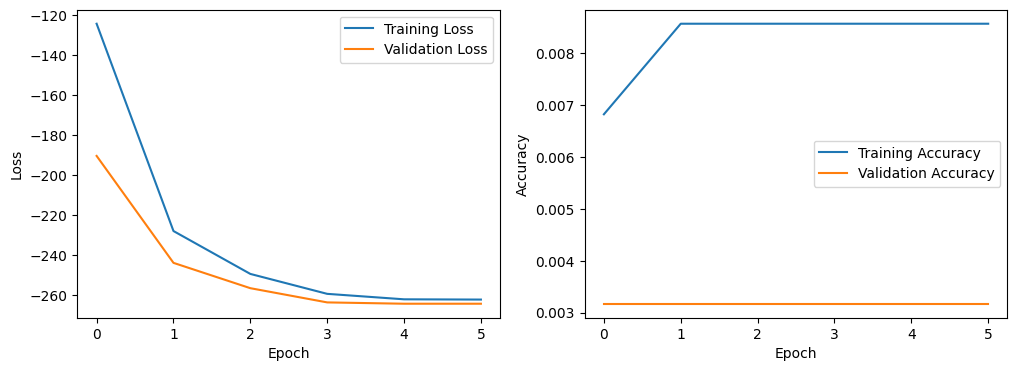

In [389]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()